## 1. 포화도 라벨링 기준 설정 및 라벨링
**경쟁강도 :: 상권 점포수 / 행정동 점포수** -> 이것만 사용하기로 결정  
매출경쟁도 :: 상권 당월 매출 / 해당 행정동 당월 매출  
상권밀집도 :: 상권 점포수 / 상권 면적

포화지수 = (경쟁강도 * 0.4) + (매출경쟁도 * 0.4) + (상권밀집도 * 0.2)

In [23]:
import pandas as pd
import numpy as np
from scipy import stats

# 1. 데이터 불러오기
# CSV 파일이 로컬에 있다면 파일 경로를 사용하세요.
# 예를 들어, 파일명이 "seoulsisanggweonbunseog_sample.csv"라고 가정합니다.
df = pd.read_csv(r"C:\Users\m\project\공공데이터_상권분석\data\머신러닝\피처엔지니어링일단다한통합데이터.csv")

# 경쟁강도 지수 계산
df['경쟁강도'] = df['점포_수'] / df.groupby('행정동_코드_명')['점포_수'].transform('sum')


In [17]:
# 1. 단순 랜덤 샘플링
sample_size = 1000  # 원하는 샘플 크기
random_sample = df.sample(n=sample_size, random_state=42)

random_sample.to_csv(r"C:\Users\m\project\공공데이터_상권분석\data\머신러닝\종합_서울상권분석데이터.csv", index=False, encoding='utf-8-sig')

In [24]:
# 경쟁강도 컬럼의 평균 계산
mean_competition = df['경쟁강도'].mean()

# 새로운 컬럼 생성하여 라벨링
df['상권_상태'] = np.where(df['경쟁강도'] >= mean_competition, '포화', '여유')

### 가설검정

c:\Users\m\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 118621.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\m\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 326961.
  res = hypotest_fun_out(*samples, **kwds)


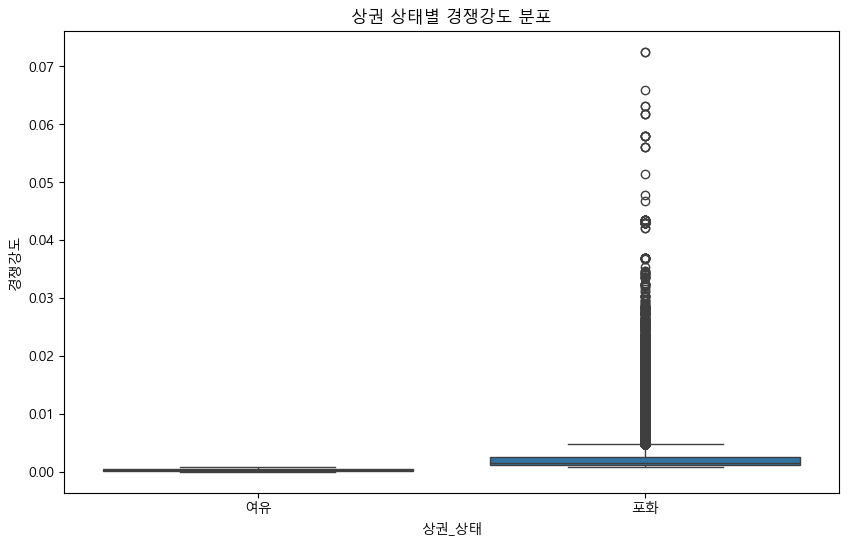


=== 검정 결과 ===
1. 정규성 검정 p-value (포화/여유): 2.5079421031239045e-164 / 2.9756342052250662e-120
2. 등분산성 검정 p-value: 0.0
3. Mann-Whitney U 검정 p-value: 0.0


In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 정규성 검정
saturated = df[df['상권_상태']=='포화']['경쟁강도']
unsaturated = df[df['상권_상태']=='여유']['경쟁강도']

stat_sat, p_sat = stats.shapiro(saturated)
stat_unsat, p_unsat = stats.shapiro(unsaturated)

# 2. 등분산성 검정
stat_lev, p_lev = stats.levene(saturated, unsaturated)

# 3. Mann-Whitney U test (비모수 검정)
stat_mw, p_mw = stats.mannwhitneyu(saturated, unsaturated)

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우의 경우
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지

# 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='상권_상태', y='경쟁강도', data=df)
plt.title('상권 상태별 경쟁강도 분포')
plt.show()

# 결과 출력
print("\n=== 검정 결과 ===")
print("1. 정규성 검정 p-value (포화/여유):", p_sat, "/", p_unsat)
print("2. 등분산성 검정 p-value:", p_lev)
print("3. Mann-Whitney U 검정 p-value:", p_mw)

### 비모수 검정


=== Mann-Whitney U 검정 결과 ===
통계량: 38784440781.0
p-value: 0.0

=== 기술통계량 ===
          count      mean       std       min       25%       50%       75%  \
상권_상태                                                                         
여유     326961.0  0.000330  0.000236  0.000000  0.000134  0.000283  0.000497   
포화     118621.0  0.002412  0.002641  0.000885  0.001142  0.001561  0.002584   

            max  
상권_상태            
여유     0.000884  
포화     0.072464  

=== 중위수 비교 ===
상권_상태
여유    0.000283
포화    0.001561
Name: 경쟁강도, dtype: float64


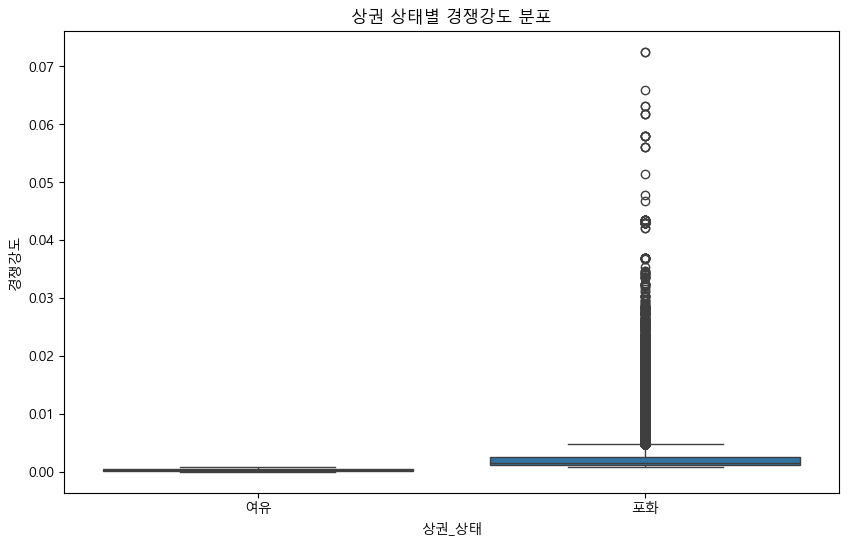

In [26]:
# 두 그룹으로 데이터 분리
saturated = df[df['상권_상태']=='포화']['경쟁강도']
unsaturated = df[df['상권_상태']=='여유']['경쟁강도']

# Mann-Whitney U 검정 수행
statistic, pvalue = stats.mannwhitneyu(saturated, unsaturated, 
                                     alternative='two-sided')

# 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='상권_상태', y='경쟁강도', data=df)
plt.title('상권 상태별 경쟁강도 분포')

# 기술통계량 계산
desc_stats = df.groupby('상권_상태')['경쟁강도'].describe()

# 결과 출력
print("\n=== Mann-Whitney U 검정 결과 ===")
print(f"통계량: {statistic}")
print(f"p-value: {pvalue}")

print("\n=== 기술통계량 ===")
print(desc_stats)

# 각 그룹의 중위수 출력
print("\n=== 중위수 비교 ===")
print(df.groupby('상권_상태')['경쟁강도'].median())

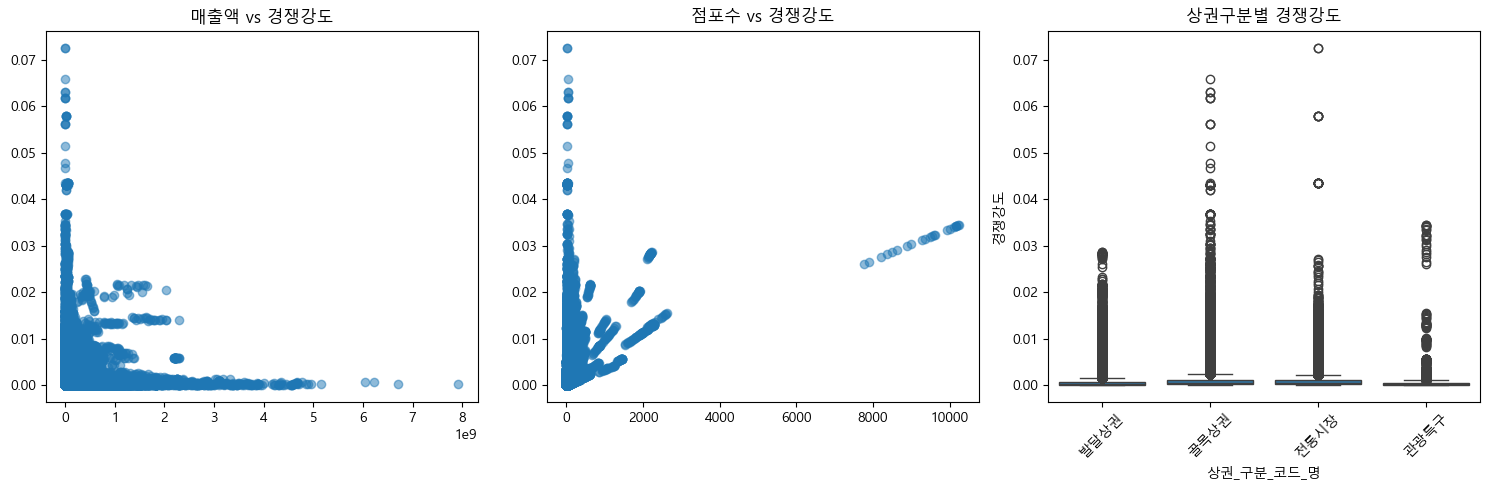


=== 분석 결과 ===
1. 매출액-경쟁강도 상관계수: -0.0779335387634301
   p-value: 0.0

2. 점포수-경쟁강도 상관계수: 0.5141708080242481
   p-value: 0.0

3. 상권구분별 경쟁강도 차이 검정
   Kruskal-Wallis H: 15372.38441021179
   p-value: 0.0


In [28]:
# 1. 매출액과 경쟁강도 상관관계 분석
correlation_sales = stats.spearmanr(df['당월_매출_금액'], df['경쟁강도'])

# 2. 점포수와 경쟁강도 상관관계 분석
correlation_stores = stats.spearmanr(df['점포_수'], df['경쟁강도'])

# 3. 상권 구분별 경쟁강도 차이 분석
kruskal_result = stats.kruskal(*[group['경쟁강도'].values 
                                for name, group in df.groupby('상권_구분_코드_명')])

# 시각화
plt.figure(figsize=(15,5))

# 1. 매출액-경쟁강도 산점도
plt.subplot(131)
plt.scatter(df['당월_매출_금액'], df['경쟁강도'], alpha=0.5)
plt.title('매출액 vs 경쟁강도')

# 2. 점포수-경쟁강도 산점도
plt.subplot(132)
plt.scatter(df['점포_수'], df['경쟁강도'], alpha=0.5)
plt.title('점포수 vs 경쟁강도')

# 3. 상권구분별 경쟁강도 박스플롯
plt.subplot(133)
sns.boxplot(x='상권_구분_코드_명', y='경쟁강도', data=df)
plt.xticks(rotation=45)
plt.title('상권구분별 경쟁강도')

plt.tight_layout()
plt.show()

# 결과 출력
print("\n=== 분석 결과 ===")
print("1. 매출액-경쟁강도 상관계수:", correlation_sales[0])
print("   p-value:", correlation_sales[1])
print("\n2. 점포수-경쟁강도 상관계수:", correlation_stores[0])
print("   p-value:", correlation_stores[1])
print("\n3. 상권구분별 경쟁강도 차이 검정")
print("   Kruskal-Wallis H:", kruskal_result[0])
print("   p-value:", kruskal_result[1])


분석 결과에 대해 다음과 같이 해석할 수 있습니다:

## 1. 매출액과 경쟁강도의 관계
- 상관계수: -0.078 (약한 음의 상관관계)
- p-value가 0.0으로 통계적으로 유의미함
- 경쟁강도가 높을수록 매출액이 오히려 약간 감소하는 경향을 보임
- 이는 과도한 경쟁이 개별 점포의 매출에 부정적 영향을 미칠 수 있음을 시사

## 2. 점포수와 경쟁강도의 관계
- 상관계수: 0.514 (중간 정도의 양의 상관관계)
- p-value가 0.0으로 통계적으로 유의미함
- 점포수가 많을수록 경쟁강도가 높아지는 뚜렷한 경향이 있음
- 이는 경쟁강도 지표가 실제 시장의 경쟁 상황을 잘 반영함을 보여줌

## 3. 상권 구분별 차이
- Kruskal-Wallis H 통계량: 15372.38
- p-value가 0.0으로 통계적으로 매우 유의미함
- 상권 구분(발달상권/골목상권/전통시장 등)에 따라 경쟁강도에 명확한 차이가 있음
- 이는 상권 유형별로 서로 다른 경쟁 환경이 형성되어 있음을 의미

## 종합 결론
1. 경쟁강도는 실제 시장 상황을 잘 반영하는 신뢰할 만한 지표임
2. 과도한 경쟁은 매출에 부정적 영향을 미칠 수 있음
3. 상권 유형별로 차별화된 경쟁 환경이 존재함

이러한 결과는 경쟁강도를 상권 분석의 중요한 지표로 활용할 수 있음을 보여줍니다.

In [34]:
# 상권_상태별 개수 계산
status_count = df['상권_상태'].value_counts()

# 결과 출력
print("\n=== 상권 상태별 개수 ===")
print(status_count)
print("\n=== 상권 상태별 비율(%) ===")
print(status_count / len(df) * 100)


=== 상권 상태별 개수 ===
상권_상태
여유    326961
포화    118621
Name: count, dtype: int64

=== 상권 상태별 비율(%) ===
상권_상태
여유    73.378413
포화    26.621587
Name: count, dtype: float64
